# Tutorial: Use on video




## 1. Image augmentation on video frames
Take an example of Rotation in "imgaug" library

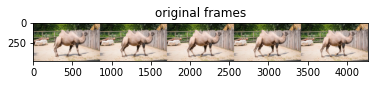

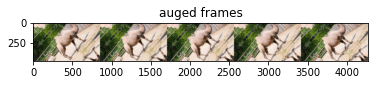

In [20]:
# import the opencv library
import cv2
import beacon_aug as BA 
import cv2
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import os
import random

# define a video capture object
vidcap = cv2.VideoCapture("Your video path")
count = 0
success,frame = vidcap.read()

# define an augmentation pipeline (can be replaced to any image augmentations)
aug_pipeline = BA.Compose([
    BA.Rotate(p=1,limit=(-90,90), library= "albumentations")
])

seed = 100
original_frames = []
auged_frames = []
while(success and count < 5):      

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    BA.properties.set_seed(seed)
    frame_auged = aug_pipeline(image=frame)['image']

    # cv2.imwrite(os.path.join(output_path, "frame%d.jpg" % count), frame_auged) 
    original_frames.append(frame)
    auged_frames.append(frame_auged)

    # next frame
    success,frame = vidcap.read()
    count += 1


plt.figure();plt.title("original frames")
plt.imshow(np.hstack(original_frames))

plt.figure();plt.title("auged frames")
plt.imshow(np.hstack(auged_frames))
